In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set - from August 1st to August 7th
Trip_Temp = calc_temps("2017-08-01", "2017-08-07")
Trip_Temp_Data = Trip_Temp[0]
Trip_Temp_Data

(72.0, 79.25, 83.0)

In [11]:
Trip_Temp_Dic = {"Min": Trip_Temp_Data[0], "Average": Trip_Temp_Data[1],"Max": Trip_Temp_Data[2]}
Trip_Temp_Df = pd.DataFrame(Trip_Temp_Dic, index = [0])
Trip_Temp_Df

,Min,Average,Max
0,72.0,79.25,83.0


In [12]:
Trip_Temp_Df[" "] = ["Temperature"]
Trip_Temp_Df = Trip_Temp_Df.set_index(" ")
Trip_Temp_Df

,Min,Average,Max
,,,
Temperature,72.0,79.25,83.0


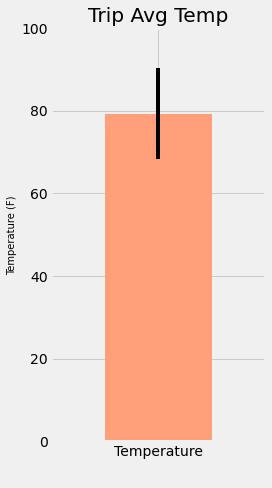

In [13]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

yerror = Trip_Temp_Df["Max"]-Trip_Temp_Df["Min"]

Trip_Temp_Plot = Trip_Temp_Df["Average"].plot(kind="bar", title = "Trip Avg Temp", ylim=(0,100), xlim = (-1, 1), color="lightsalmon", yerr=yerror, rot = 360, figsize = (4,7))
plt.ylabel("Temperature (F)", fontsize = "10")
plt.tight_layout()
plt.savefig("Output/TripAvgTemp.png")
plt.show()

### Daily Rainfall Average

In [14]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [15]:
# matching dates.
sel = [Measurement.date,
       Measurement.prcp, 
       Measurement.station]
Rainfall_Per_Station = session.query(*sel).filter(Measurement.date >= "2016-08-01").filter(Measurement.date <= "2016-08-07").all()

In [16]:
Rainfall_Per_Station

[('2016-08-01', 0.08, 'USC00519397'),
 ('2016-08-02', 0.05, 'USC00519397'),
 ('2016-08-03', 0.0, 'USC00519397'),
 ('2016-08-04', 0.04, 'USC00519397'),
 ('2016-08-05', 0.01, 'USC00519397'),
 ('2016-08-06', 0.0, 'USC00519397'),
 ('2016-08-07', 0.39, 'USC00519397'),
 ('2016-08-01', 2.35, 'USC00513117'),
 ('2016-08-02', 0.2, 'USC00513117'),
 ('2016-08-03', 0.02, 'USC00513117'),
 ('2016-08-04', 0.62, 'USC00513117'),
 ('2016-08-05', 0.03, 'USC00513117'),
 ('2016-08-06', 0.07, 'USC00513117'),
 ('2016-08-07', 0.3, 'USC00513117'),
 ('2016-08-01', None, 'USC00514830'),
 ('2016-08-02', 0.55, 'USC00514830'),
 ('2016-08-03', 0.0, 'USC00514830'),
 ('2016-08-06', None, 'USC00514830'),
 ('2016-08-07', 0.48, 'USC00514830'),
 ('2016-08-02', 0.0, 'USC00517948'),
 ('2016-08-03', 0.02, 'USC00517948'),
 ('2016-08-04', 0.13, 'USC00517948'),
 ('2016-08-05', 0.03, 'USC00517948'),
 ('2016-08-01', 0.54, 'USC00519523'),
 ('2016-08-02', 0.07, 'USC00519523'),
 ('2016-08-03', 0.0, 'USC00519523'),
 ('2016-08-04', 0.2

In [17]:
Rainfall_Per_Station_Data = pd.DataFrame(Rainfall_Per_Station, columns=["date","precipitation","station"])
Rainfall_Per_Station_Data.dropna()

,date,precipitation,station
0,2016-08-01,0.08,USC00519397
1,2016-08-02,0.05,USC00519397
2,2016-08-03,0.00,USC00519397
3,2016-08-04,0.04,USC00519397
4,2016-08-05,0.01,USC00519397
5,2016-08-06,0.00,USC00519397
6,2016-08-07,0.39,USC00519397
7,2016-08-01,2.35,USC00513117
8,2016-08-02,0.20,USC00513117
9,2016-08-03,0.02,USC00513117


In [18]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
Rainfall_Per_Station_Data_Sum = pd.DataFrame(Rainfall_Per_Station_Data.groupby("station").sum()["precipitation"])
Rainfall_Per_Station_Data_Sum = Rainfall_Per_Station_Data_Sum.sort_values(["precipitation"], ascending=False)
Rainfall_Per_Station_Data_Sum

,precipitation
station,
USC00519281,6.02
USC00516128,4.65
USC00513117,3.59
USC00519523,1.30
USC00514830,1.03
USC00519397,0.57
USC00517948,0.18


In [19]:
sel = [Station.station, 
       Station.name,
       Station.latitude,
       Station.longitude,
       Station.elevation]
StationInfo = session.query(*sel).all()
StationInfo

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [20]:
StationInfo_df = pd.DataFrame(StationInfo, columns=["station", "name", "latitude", "longtitude","elevation"])
StationInfo_df

,station,name,latitude,longtitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [21]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
Rain_and_StationInfo_df = pd.merge(Rainfall_Per_Station_Data_Sum, StationInfo_df, how="outer", on=["station"])
Rain_and_StationInfo_df

,station,precipitation,name,latitude,longtitude,elevation
0,USC00519281,6.02,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
1,USC00516128,4.65,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
2,USC00513117,3.59,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00519523,1.30,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,USC00514830,1.03,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,USC00519397,0.57,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,USC00517948,0.18,"PEARL CITY, HI US",21.39340,-157.97510,11.9
7,USC00518838,NaN,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
8,USC00511918,NaN,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9


### Daily Temperature Normals

In [22]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [23]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
trip_dates = pd.date_range(start_date, end_date)

# Strip off the year and save a list of strings in the format %m-%d
trip_dates_without_year = [trip_dates[d].strftime("%m-%d") for d in range(len(trip_dates))]

# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.

normals = []

for date in range(len(trip_dates_without_year)):
    result = daily_normals(trip_dates_without_year[date])
    normals.append(result[0])
    
print (normals)


[(67.0, 75.54, 83.0), (68.0, 75.60377358490567, 84.0), (70.0, 76.61111111111111, 85.0), (69.0, 76.71153846153847, 84.0), (69.0, 76.14814814814815, 82.0), (67.0, 76.25, 83.0), (71.0, 77.15686274509804, 83.0)]


In [24]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
MinTemp = [normals[minimum][0] for minimum in range(len(normals))]
AverageTemp = [normals[average][1] for average in range(len(normals))]
MaxTemp = [normals[maximum][2] for maximum in range(len(normals))]

Trip_Data = pd.DataFrame({"date": trip_dates, "min_temp": MinTemp, "average_temp": AverageTemp, "max_temp": MaxTemp})
Trip_Data = Trip_Data.set_index("date")
Trip_Data

,min_temp,average_temp,max_temp
date,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


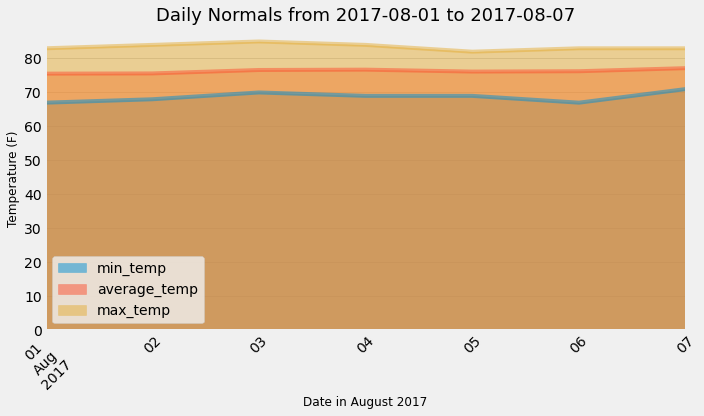

In [25]:
# Plot the daily normals as an area plot with `stacked=False`
Trip_Data.plot.area(figsize=(10,6), stacked=False, rot=45)
plt.title(f"Daily Normals from {start_date} to {end_date}", fontsize=18)
plt.xlabel("Date in August 2017", fontsize = "12")
plt.ylabel("Temperature (F)", fontsize = "12")
plt.tight_layout()
plt.savefig('Output/Daily_normals_trip_temperature.png')


## Close Session

In [26]:
session.close()